In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_name = "L:/year2_sem3/Pembroke/supervision/Russia-Ukraine war/stock price"
STOCK_PRICE = os.listdir(path_name)
STOCK_PRICE

['AAPL_2022-01-01~2022-04-30.csv',
 'AMZN_2022-01-01~2022-04-30.csv',
 'BRK-B_2022-01-01~2022-04-30.csv',
 'FB7926-USD_2022-01-01~2022-04-30.csv',
 'GOOGL_2022-01-01~2022-04-30.csv',
 'JNJ_2022-01-01~2022-04-30.csv',
 'KO_2022-01-01~2022-04-30.csv',
 'MSFT_2022-01-01~2022-04-30.csv',
 'PG_2022-01-01~2022-04-30.csv',
 'XOM_2022-01-01~2022-04-30.csv']

In [3]:
stock_reader = {}

for file in STOCK_PRICE:
    stock = pd.read_csv(f"{path_name}/{file}")
    stock["Date"] = pd.to_datetime( stock["Date"], format = '%d/%m/%Y')
    stock["Return"] = stock["Close"].pct_change(1)
    stock.set_index("Date",inplace = True)
    stock_reader[file.split("_")[0]] = stock

In [4]:
stock_reader["AAPL"].head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.434280,104487900,NaN
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.144302,99310400,-0.012692
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.405670,94537600,-0.026600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.510971,96904000,-0.016693
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.679504,86709100,0.000988


In [5]:
stock_close = pd.DataFrame()
for file in stock_reader.keys():
    stock_close[file] = stock_reader[file]["Close"]

In [6]:
stock_close["2022-02-15":"2022-03-10"]

,AAPL,AMZN,BRK-B,FB7926-USD,GOOGL,JNJ,KO,MSFT,PG,XOM
Date,,,,,,,,,,
2022-02-15,172.789993,156.510498,316.200012,216.887238,136.608505,167.309998,60.910000,300.470001,156.820007,77.989998
2022-02-16,172.550003,158.100494,315.649994,214.719437,137.738007,167.210007,60.900002,299.500000,158.009995,78.349998
2022-02-17,168.880005,154.652496,313.549988,208.532349,132.539001,166.190002,62.119999,290.730011,159.820007,78.230003
2022-02-18,167.300003,152.601501,314.799988,207.248093,130.403000,163.360001,62.540001,287.929993,159.899994,77.360001
2022-02-22,164.320007,150.197495,314.160004,206.278992,129.813507,161.139999,62.279999,287.720001,157.929993,76.459999
2022-02-23,160.070007,144.826996,309.989990,203.066895,127.587997,161.220001,61.590000,280.269989,155.960007,76.769997
2022-02-24,162.740005,151.358002,308.279999,202.213882,132.690994,158.139999,60.509998,294.589996,151.759995,75.800003
2022-02-25,164.850006,153.788498,319.239990,210.225540,134.459503,166.000000,62.849998,297.309998,158.240005,77.839996
2022-02-28,165.119995,153.563004,321.450012,205.350510,135.057007,164.570007,62.240002,298.790009,155.889999,78.419998


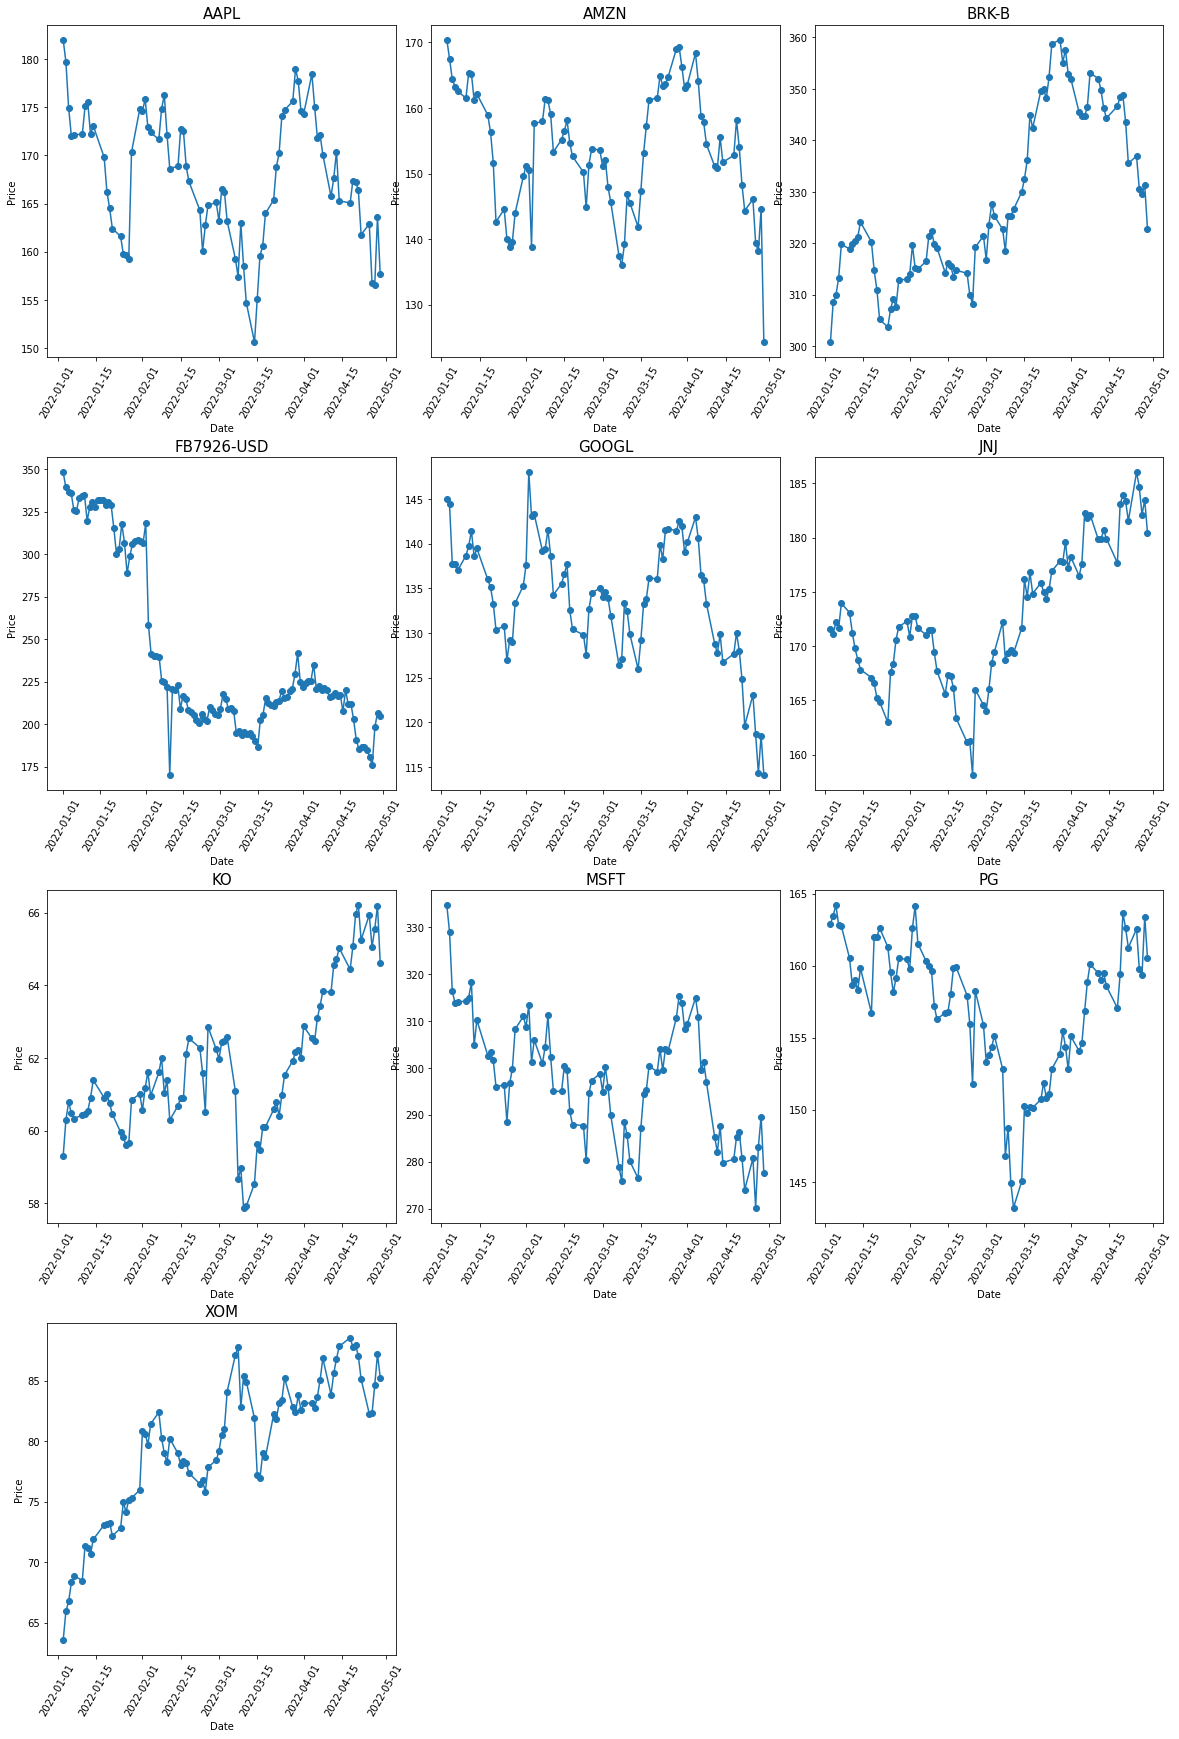

In [7]:
#Price
plt.figure(figsize=(20, 30))
for i in range(0,10):
    plt.subplot(4,3,i+1)
    file_name = STOCK_PRICE[i].split("_")[0]
    plt.title(file_name,fontsize = 15)
    plt.xticks(rotation=60) 
    plt.plot(stock_reader[file_name]["Close"],marker = 'o')
    plt.ylabel('Price', fontsize = 10)
    plt.xlabel('Date', fontsize = 10)
    plt.subplots_adjust(wspace =0.1, hspace = 0.3)
plt.show()

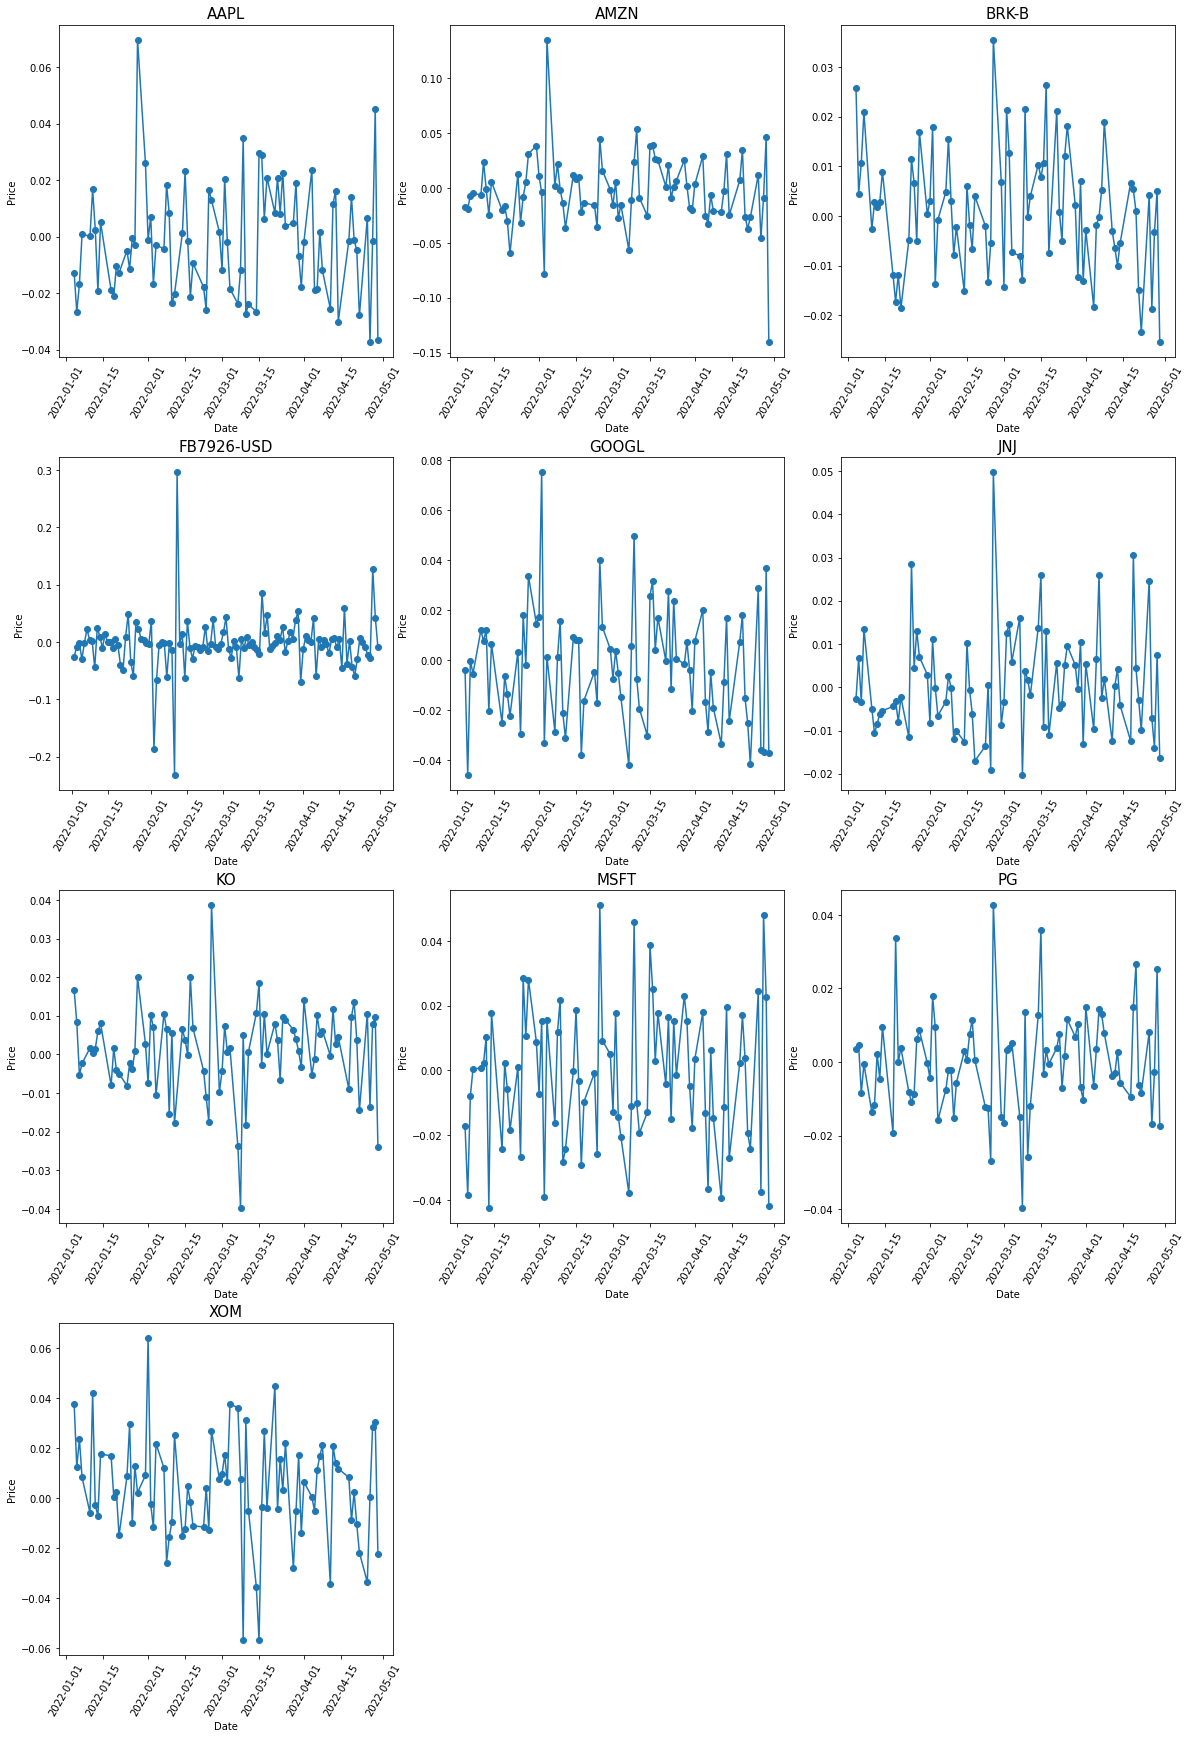

In [8]:
#Return
plt.figure(figsize=(20, 30))
for i in range(0,10):
    plt.subplot(4,3,i+1)
    file_name = STOCK_PRICE[i].split("_")[0]
    plt.title(file_name,fontsize = 15)
    plt.xticks(rotation=60) 
    plt.plot(stock_reader[file_name]["Return"],marker = 'o')
    plt.ylabel('Price', fontsize = 10)
    plt.xlabel('Date', fontsize = 10)
    plt.subplots_adjust(wspace =0.17, hspace = 0.3)
plt.show()